# Data Wrangling & Analysis
> **Wrangle & Analyze the WeRateDogs Twitter Archive**

## Table of Contents

<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#assess">Assess Data</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analysis-visu">Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ol>

<a id='intro'></a>
## Introduction

"We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data (gather, assess, and clean), store the data, perform relevant analysis and provide visualizations.

In [2]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import time

<a id='gather'></a>
## Gather Data

#### 1. Enhanced Twitter Archive
Download **twitter_archive_enhanced.csv** manually from Udacity server and read the data into a pandas dataframe

In [3]:
# Import the Twitter archive CSV file into a DataFrame
twt_arc_df = pd.read_csv('C:\\Users\\Somesh\\Udacity Projects\\Project-4 Analyze Twitter Data\\twitter_archive_enhanced.csv')

**2. Image Predictions File**

**image_predictions.tsv** contains tweet image predictions and can be downloaded programmatically using the requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# Download tweet image predictions tsv using requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode="wb") as file:
    file.write(response.content)

# Import the newly written file into a dataframe
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

**3. Download Tweet JSON Data**

Query the twitter api using python's tweepy library to get the entire set of json data for each tweet present in twitter archive file. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

In [7]:
# Read your API keys and access tokens into variables
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [9]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON
start_time = time.time()

error_string = ""
valid_tweet_count = 0
error_tweet_count = 0
tweet_ids = twt_arc_df.tweet_id
with open('tweet_json.txt',mode='w',encoding='utf-8') as outfile:
    for i, tweet_id in tweet_ids.iteritems():
        try:
            print(f"{i+1}. {tweet_id}")
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json_content = tweet._json
            json.dump(json_content,outfile)
            outfile.write("\n")
            valid_tweet_count += 1
        except tweepy.TweepError as e:
            error_tweet_count += 1            
            error_string += str(tweet_id)
            error_string += ': '
            error_string += e.response.json()['errors'][0]['message']
            print(''.join(error_string))
            error_string += '\n'
            continue

end_time = time.time()

elapsed_time = end_time - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print(f"Total number of tweets = {twt_arc_df.tweet_id.shape[0]}")
print(f"Total number of valid tweets = {valid_tweet_count}")
print(f"Total number of invalid tweets = {error_tweet_count}")
print(f"Time taken to get all the tweet's json is {elapsed_time_str}")

with open('error_tweets.txt', mode='w',encoding='utf-8') as errorfile:
    errorfile.write(error_string)

1. 892420643555336193
2. 892177421306343426
3. 891815181378084864
4. 891689557279858688
5. 891327558926688256
6. 891087950875897856
7. 890971913173991426
8. 890729181411237888
9. 890609185150312448
10. 890240255349198849
11. 890006608113172480
12. 889880896479866881
13. 889665388333682689
14. 889638837579907072
15. 889531135344209921
16. 889278841981685760
17. 888917238123831296
18. 888804989199671297
19. 888554962724278272
20. 888202515573088257
888202515573088257: No status found with that ID.
21. 888078434458587136
22. 887705289381826560
23. 887517139158093824
24. 887473957103951883
25. 887343217045368832
26. 887101392804085760
27. 886983233522544640
28. 886736880519319552
29. 886680336477933568
30. 886366144734445568
31. 886267009285017600
32. 886258384151887873
33. 886054160059072513
34. 885984800019947520
35. 885528943205470208
36. 885518971528720385
37. 885311592912609280
38. 885167619883638784
39. 884925521741709313
40. 884876753390489601
41. 884562892145688576
42. 884441805382

Rate limit reached. Sleeping for: 520


902. 758474966123810816
903. 758467244762497024
904. 758405701903519748
905. 758355060040593408
906. 758099635764359168
907. 758041019896193024
908. 757741869644341248
909. 757729163776290825
910. 757725642876129280
911. 757611664640446465
912. 757597904299253760
913. 757596066325864448
914. 757400162377592832
915. 757393109802180609
916. 757354760399941633
917. 756998049151549440
918. 756939218950160384
919. 756651752796094464
920. 756526248105566208
921. 756303284449767430
922. 756288534030475264
923. 756275833623502848
924. 755955933503782912
925. 755206590534418437
926. 755110668769038337
927. 754874841593970688
928. 754856583969079297
929. 754747087846248448
930. 754482103782404096
931. 754449512966619136
932. 754120377874386944
933. 754011816964026368
888202515573088257: No status found with that ID.
873697596434513921: No status found with that ID.
872668790621863937: No status found with that ID.
872261713294495745: No status found with that ID.
869988702071779329: No status fo

Rate limit reached. Sleeping for: 516


1802. 676957860086095872
1803. 676949632774234114
1804. 676948236477857792
1805. 676946864479084545
1806. 676942428000112642
1807. 676936541936185344
1808. 676916996760600576
1809. 676897532954456065
1810. 676864501615042560
1811. 676821958043033607
1812. 676819651066732545
1813. 676811746707918848
1814. 676776431406465024
1815. 676617503762681856
1816. 676613908052996102
1817. 676606785097199616
1818. 676603393314578432
1819. 676593408224403456
1820. 676590572941893632
1821. 676588346097852417
1822. 676582956622721024
1823. 676575501977128964
1824. 676533798876651520
1825. 676496375194980353
1826. 676470639084101634
1827. 676440007570247681
1828. 676430933382295552
1829. 676263575653122048
1830. 676237365392908289
1831. 676219687039057920
1832. 676215927814406144
1833. 676191832485810177
1834. 676146341966438401
1835. 676121918416756736
1836. 676101918813499392
1837. 676098748976615425
1838. 676089483918516224
1839. 675898130735476737
1840. 675891555769696257
1841. 675888385639251968


In [5]:
# Get the json data into a dataframe
tweet_json_data = []

with open("tweet_json.txt",mode='r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        tweet_json_data.append({"tweet_id" : status['id'],
                               "retweet_count" : status['retweet_count'],
                               "favorite_count" : status['favorite_count']
                               })
        
tweet_data_df = pd.DataFrame(tweet_json_data, columns=['tweet_id','retweet_count','favorite_count'])

<a id='assess'></a>
## Assess Data

As gathering of data is done, we will now assess the data both visually and programmatically for quality and tidiness issues. This phase typically involves below 2 steps.
- **Detect** - Detecting the issue
- **Document** - Documenting the issue

##### View sample of data from the 3 dataframes

In [9]:
twt_arc_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
2099,670717338665226240,NaN,NaN,2015-11-28 21:34:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screams for a little bit and then crumples to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670717338...,12,10,None,None,None,None,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None


In [10]:
img_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True
1498,783695101801398276,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True


In [11]:
tweet_data_df.sample(5)

,tweet_id,retweet_count,favorite_count
2001,671879137494245376,643,1365
1299,706265994973601792,935,2741
218,848324959059550208,4545,24530
1308,705475953783398401,917,2964
375,826204788643753985,940,4947


##### Understand the columns, descriptive names, datatypes, missing values, size, memory etc of the 3 dataframes

In [12]:
twt_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Description of twt_arc_df columns:

- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog stages
- **floofer**: one of the 4 dog stages
- **pupper**: one of the 4 dog stages
- **puppo**: one of the 4 dog stages

Details of twt_arc_df dataframe:

- Contains 2356 rows in total
- There are 181 retweets (number of rows in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns)
- There are 78 replies (number of rows in in_reply_to_status_id, in_reply_to_user_id columns)
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo)

In [13]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Description of img_df columns:

- **tweet_id** is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- **p1** is the algorithm's #1 prediction for the image in the tweet
- **p1_conf** is how confident the algorithm is in its #1 prediction
- **p1_dog** is whether or not the #1 prediction is a breed of dog
- **p2** is the algorithm's second most likely prediction
- **p2_conf** is how confident the algorithm is in its #2 prediction
- **p2_dog** is whether or not the #2 prediction is a breed of dog
- **p3** is the algorithm's third most likely prediction
- **p3_conf** is how confident the algorithm is in its #3 prediction
- **p3_dog** is whether or not the #3 prediction is a breed of dog

Details of img_df dataframe:
- Contains 2075 rows in total
- Number of records in img_id are less when compared to twt_arc_df

In [14]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


Description of tweet_data_df columns:

- **id**: unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users

Details of tweet_data_df dataframe:
- Contains 2331 entried in total
- Total number of rows doesn't match with number of rows in twt_arc_df

### twt_arc_df assessment

In [15]:
# 1. Check if there are records in twitter archive that are missing images

num_recs = len(twt_arc_df[~twt_arc_df.tweet_id.isin(img_df.tweet_id)])

print(f"Number of missing tweets that are missing images = {num_recs}")

Number of missing tweets that are missing images = 281


In [16]:
# 2. Sort by rating_denominator values

twt_arc_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [17]:
# 3. Sort by rating_numerator values

twt_arc_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [18]:
# 4. Dog names in descending order

twt_arc_df.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [19]:
# 5. Unique values of each stage & duplicate tweets in the dataset

print("Unique values in doggo stage are")
print("==========================================")
print(twt_arc_df.doggo.value_counts())
print("\nUnique values in floofer stage are")
print("==========================================")
print(twt_arc_df.floofer.value_counts())
print("\nUnique values in pupper stage are")
print("==========================================")
print(twt_arc_df.pupper.value_counts())
print("\nUnique values in puppo stage are")
print("==========================================")
print(twt_arc_df.puppo.value_counts())
print("==========================================")
print(f"# Duplicate tweets in dataset are: {len(twt_arc_df[twt_arc_df.tweet_id.duplicated()==True])}")

Unique values in doggo stage are
None     2259
doggo      97
Name: doggo, dtype: int64

Unique values in floofer stage are
None       2346
floofer      10
Name: floofer, dtype: int64

Unique values in pupper stage are
None      2099
pupper     257
Name: pupper, dtype: int64

Unique values in puppo stage are
None     2326
puppo      30
Name: puppo, dtype: int64
# Duplicate tweets in dataset are: 0


In [20]:
# 6. Check if a dong belongs to more than one stage

mylist = ['Multi' if x > 1 else 'Single' for x in np.sum(twt_arc_df[['doggo','floofer','pupper','puppo']].values != 'None', axis=1)]

print(f"Number of dogs that belong to more than one stage are {mylist.count('Multi')}")

Number of dogs that belong to more than one stage are 14


### img_df assessment

In [21]:
# 1. Get the dog breed and their count

img_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
mortarboard             1
starfish                1
flamingo                1
bib                     1
syringe                 1
Name: p1, Length: 378, dtype: int64

In [22]:
# 2. Understand how many images are present in each tweet

img_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
# 3. Check if jpg_url column contains multiple urls

img_df[img_df.jpg_url.str.count("https://")>1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
# Check if p1 and p2, their properties are not missed

print(sum(img_df.p1.isnull()))

print(sum(img_df.p1_conf.isnull()))

print(sum(img_df.p1_dog.isnull()))

print(sum(img_df.p2.isnull()))

print(sum(img_df.p2_conf.isnull()))

print(sum(img_df.p2_dog.isnull()))

0
0
0
0
0
0


### Quality Issues

Following are a few of the quality issues observed in datasets.

- <a href = #Q1>#Q1</a>: Number of tweets in 'twt_arc_df' dataframe are more than that of 'img_df' dataframe
- <a href = #Q2>#Q2</a> Contains 181 records of retweet data which aren't needed for our analysis
- <a href = #Q3>#Q3</a> Columns 'in_reply_to_status_id', 'in_reply_to_user_id' and 'timestamp' in 'twt_arc_df' has invalid datatypes
- <a href = #Q4>#Q4</a> Column 'source' in 'twt_arc_df' has some unneeded html tags (urls are embedded in betwwen anchor tags) which aren't needed.
- <a href = #Q5>#Q5</a> Inaccurate data in 'name' column (Ex: a, an by etc are filled in some of the rows)  in 'twt_arc_df' dataset
- <a href = #Q6>#Q6</a> Column 'rating_denominator'  in 'twt_arc_df' has values both greater than 10 and less than 10
- <a href = #Q7>#Q7</a> Column 'rating_numerator'  in 'twt_arc_df' has values less than 10 and some far greater than 10 which are not expected
- <a href='#Q8'>#Q8</a> Columns 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' in 'twt_arc_df' dataset aren't needed for our analysis as we are only dealing with original tweet data
    - 

### Tidiness Issues

Following are a few tidiness issues observed in the datasets.

- <a href='#T1'>#T1</a> Need to convert 4 dog stage columns (doggo, floofer, pupper, puppo) into one column called 'dog_stage'
- <a href='#T2'>#T2</a> Information about one type of observational unit (tweets) is spread across three different datasets. Therefore, these three datasets should be merged as they are part of the same observational unit.

<a id='clean'></a>
## Clean Data

Before we clean up the quality and tidiness issues, it is a best practice to make copies of existing datasets and use to to clean our data. It is not suggestible to work on the original pandas dataframe. We will create copies of the dataset as shown below.

In [209]:
archive_df_clean = twt_arc_df.copy()
img_df_clean = img_df.copy()
tweet_data_df_clean = tweet_data_df.copy()

### Quality Issue

**<a id='Q1'>Q1:</a> Number of tweets in 'twt_arc_df' are more than that of 'img_df' dataset**

**Define**

There are 281 more tweets in 'twt_arc_df' dataset than in 'img_df' dataset. We should not use the tweets that are not in 'img_df' dataset for our analysis. Therefore, we will remove the extra 281 tweets in 'twt_arc_df' dataset

**Code**

In [210]:
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(img_df_clean.tweet_id)]

**Test**

In [211]:
# number of records in the archive_df_clean that are not in img_df_clean should be 0

len(archive_df_clean[~archive_df_clean.tweet_id.isin(img_df_clean.tweet_id)])

0

### Quality Issue

**<a id='Q2'>Q2:</a> Contains 181 records of retweet data which aren't needed for our analysis**

**Define**

There are 181 records of retweet data in 'twt_arc_df' dataset which are not needed. We should eliminate them by choosing only the records which have null values in 'retweeted_status_id' column

**Code**

In [212]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isnull()]

**Test**

In [213]:
# Number of records with values other than null in 'retweeted_status_id' column should be 0

len(archive_df_clean[archive_df_clean.retweeted_status_id.isnull() == False])

0

### Quality Issue

<a id='Q8'>Q8:</a> Columns 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' in 'twt_arc_df' dataset aren't needed for our analysis as we are only dealing with original tweet data

In [214]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

**Define**

archive_df_clean dataset has 3 columsn (i.e 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp') with no values in them. Hence, they need to be dropped

**Code**

In [215]:
archive_df_clean = archive_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

**Test**

In [216]:
# Column names should not be displayed when info() method is used

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ 

### Quality Issue

<a id='Q3'>Q3:</a> Columns 'in_reply_to_status_id', 'in_reply_to_user_id' and 'timestamp' has invalid datatypes

**Define**

Columns 'in_reply_to_status_id', 'in_reply_to_user_id' and 'timestamp' has invalid datatypes i.e float, float and string. We need to convert them into int, int and date datatypes.

**Code**

In [217]:
archive_df_clean.in_reply_to_status_id = archive_df_clean.in_reply_to_status_id.fillna(0)
archive_df_clean.in_reply_to_user_id = archive_df_clean.in_reply_to_user_id.fillna(0)

archive_df_clean.in_reply_to_status_id = archive_df_clean.in_reply_to_status_id.astype(np.int64)
archive_df_clean.in_reply_to_user_id = archive_df_clean.in_reply_to_user_id.astype(np.int64)

archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)

**Test**

In [218]:
# Timetsamps for the columns 'in_reply_to_status_id', 'in_reply_to_user_id' and 'timestamp should be displayed as int, int and datetime when .info() method is used

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

### Quality Issue

<a id='Q4'>Q4:</a> Column 'source' in 'twt_arc_df' has some unneeded html tags (urls are embedded in betwwen anchor tags) which aren't needed.

In [219]:
archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Define**

'source' column in 'twt_arc_df' dataset has some unwanted text other than the text of the source. We should strip all unwanted text in that column and keep only the source text and then convert the datatype from string to category. Replace all html anchor tags (i.e. <a..></a>) with ''.

**Code**

In [220]:
archive_df_clean.source = archive_df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

archive_df_clean.source = archive_df_clean.source.astype('category')

**Test**

In [221]:
# value_counts() method should display only the text of the source and nothing else

archive_df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Quality Issue

<a id='Q5'>Q5:</a> Inaccurate data in 'name' column (Ex: a, an by etc are filled in some of the rows) in 'twt_arc_df' dataset

**Define**

'name' column in 'twt_arc_df' dataset contains errorneous names. Actual dog names in the column starts with a capital letter. So, replace all non-capital starting words/letters in the column with 'None' value

**Code**

In [222]:
archive_df_clean['name'][archive_df_clean['name'].str[0].str.isupper() == False] = "None"

C:\Users\Somesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Test**

In [223]:
# Check if names sorted in descending order contains words like very, much etc i.e words starting with lowercase letters and get the length of words replaced

print("Names sorted in descending order are shown below:\n")

print(archive_df_clean.name.value_counts().sort_index(ascending=False))

print(f"\nNo of None values = {len(archive_df_clean[archive_df_clean.name == 'None'])}")

Names sorted in descending order are shown below:

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 914, dtype: int64

No of None values = 644


### Quality Issue

<a id='Q6'>Q6:</a> Column 'rating_denominator'  in 'twt_arc_df' has values both greater than 10 and less than 10

**Define**

Ratings are incorrectly chosen from the text in 'twt_arc_df' dataset. We'll have to look at the 'text' column carefully and re-assign the ratings.

**Code**

In [224]:
# Create a rating dataframe with tweet_id, text, numerator & Denominator columns

rating_den_df = archive_df_clean.drop(['timestamp','source','expanded_urls','name','in_reply_to_status_id','in_reply_to_user_id','doggo','floofer','pupper','puppo'],axis=1)

In [225]:
pd.set_option("display.max_colwidth",280)

In [226]:
# Display the rows and understand them which have Denominator value different from 10

rating_den_df[rating_den_df.rating_denominator != 10]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [227]:
# correct value for tweet_id 666287406224695296 should be 9/10
archive_df_clean.loc[archive_df_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
archive_df_clean.loc[archive_df_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [228]:
# correct value for tweet_id 682962037429899265 should be 10/10
archive_df_clean.loc[archive_df_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
archive_df_clean.loc[archive_df_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

In [229]:
# correct value for tweet_id 716439118184652801 should be 11/10
archive_df_clean.loc[archive_df_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
archive_df_clean.loc[archive_df_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [230]:
# correct value for tweet_id 722974582966214656 should be 13/10
archive_df_clean.loc[archive_df_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
archive_df_clean.loc[archive_df_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10

In [231]:
# correct value for tweet_id 740373189193256964 should be 14/10
archive_df_clean.loc[archive_df_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
archive_df_clean.loc[archive_df_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [232]:
# for tweet_id 810984652412424192 there is no value assigned
# As there is no score specified, we make it 10/10
archive_df_clean.loc[archive_df_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
archive_df_clean.loc[archive_df_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10

**Test**

In [233]:
# Ratings in denominator mostly should be multiples of 10 and should only consist of the rating specified by the tweeter in 'Text' column

archive_df_clean.rating_denominator.value_counts()

10     1982
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

### Quality Issue

<a id='Q7'>Q7:</a> Column 'rating_numerator' in 'twt_arc_df' has values less than 10 (like 0, 2 , 7) which are not expected

**Define**

'rating_numerator' values between 2 to 14 seems to be quite common as there are many of these values tweeted by tweeter. So, understand the values with numerator ratings 0, 1 and >14. If there is any discrepancy between numerator value tweeted and the one shown in 'rating_numerator' column, reassign the values as assigned by the tweeter.

**Code**

In [234]:
archive_df_clean.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
420       1
204       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        1
60        1
45        1
44        1
27        1
26        1
14       36
13      262
12      450
11      397
10      421
9       151
8        95
7        51
6        32
5        33
4        15
3        19
2         9
1         4
0         2
Name: rating_numerator, dtype: int64

In [235]:
rating_num_df = archive_df_clean.drop(['timestamp','source','expanded_urls','name','in_reply_to_status_id','in_reply_to_user_id','doggo','floofer','pupper','puppo'],axis=1)

In [236]:
rating_num_df[(rating_num_df.rating_numerator > 14) | (rating_num_df.rating_numerator <2)]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [237]:
# Most of the tweets have proper ratings except for the tweets with ids 680494726643068929, 778027034220126208, 786709082849828864

archive_df_clean.loc[archive_df_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # round 11.26 to 11
archive_df_clean.loc[archive_df_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # round 11.27 to 11
archive_df_clean.loc[archive_df_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # round 9.75 to 10

**Test**

In [238]:
# Check if the values are assigned correctly using value_counts() method
archive_df_clean.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
420       1
204       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
60        1
45        1
44        1
14       36
13      262
12      450
11      399
10      422
9       151
8        95
7        51
6        32
5        33
4        15
3        19
2         9
1         4
0         2
Name: rating_numerator, dtype: int64

### Tidiness Issue

<a id='T1'>T1:</a> Need to convert 4 dog stage columns (doggo, floofer, pupper, puppo) into one column called 'dog_stage'

**Define**

There are 4 stages of dogs (doggo, floofer, pupper, puppo) displayed as 4 different columns in 'twt_arc_df' dataset. We'll merge these 4 columns into a single column called 'stage' which consists of category of these stages.

In [239]:
archive_df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1688
1,None,None,None,puppo,22
2,None,None,pupper,None,203
3,None,floofer,None,None,7
4,doggo,None,None,None,63
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


**Code**

In [240]:
# replace all 'None' with ''
archive_df_clean.doggo.replace('None', '', inplace=True)
archive_df_clean.floofer.replace('None', '', inplace=True)
archive_df_clean.pupper.replace('None', '', inplace=True)
archive_df_clean.puppo.replace('None', '', inplace=True)

In [241]:
archive_df_clean['dog_stage'] = archive_df_clean.doggo + archive_df_clean.floofer + archive_df_clean.pupper + archive_df_clean.puppo
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [242]:
# delete the columns doggo, floofer, pupper, puppo from the dataset

archive_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

**Test**

In [243]:
# check if value_counts() return all combinations of dog_stages made. All '' will be shown as an empty string
archive_df_clean.dog_stage.value_counts()

                  1688
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [244]:
# info() method should display 'dog_stage' column instead of four dog stages we just melted
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              1994 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object

### Tidiness Issue

<a id='T2'>T2:</a> Information about one type of observational unit (tweets) is spread across three different datasets. Therefore, these three datasets should be merged as they are part of the same observational unit.

**Define**

**How do we need to merge img_df_clean table with archive_df_clean table?**

We first need to create in Breed and confidence columns in img_df_clean table and then merge this table with archive_df_clean table as explained below.
1. Check if any of p1_dog, p2_dog, p3_dog columns in img_df table is true. 
2. If any of the columns are true, the get the max value of the corresponding confidence columns.
3. Now select the breed which has maximum confidence nd check if confidence > 0.95. If it is, append them to img_df dataset else mark it as None
4. Join 'twt_arc_df' and 'img_df' datasets by performing an inner join on 'tweet_id' xolumn i.e merge all columns of 'img_df' with 'twt_arc_df'
5. Remove 'p1','p1_dog','p1_conf','p3','p2_dog','p2_conf','p3','p3_dog','p3_conf' columns from twt_arc_df dataset as they are no longer needed for analysis.

**How do we need to merge tweet_data_df_clean table with archive_df_clean table?**

We need to perform innerjoin between 'archive_df_clean' and 'tweet_data_df_clean' on 'tweet_id' column and retain all the columns of the later. 

**Code**

In [245]:
# Create breed and confidence of the dog records and store it in a list and then map 2 columns to these lists

breed = []
confidence = []

for i, row in img_df_clean.iterrows():
    max_conf = -1
    if (row.p1_dog == False) and (row.p2_dog == False) and (row.p3_dog == False):
        confidence.append("None")
        breed.append("None")
        continue
    if (row.p1_dog == True) and (row.p1_conf > max_conf):
        max_conf = row.p1_conf
    if (row.p2_dog == True) and (row.p2_conf > max_conf):
        max_conf = row.p2_conf
    if (row.p3_conf == True) and (row.p3_conf > max_conf):
        max_conf = row.p3_conf
    
    confidence.append(max_conf)
    
    if max_conf < 0.95:
        breed.append("None")
        continue
    if max_conf == row.p1_conf:
        breed.append(row.p1)
    elif max_conf == row.p2_conf:
        breed.append(row.p2)
    elif max_conf == row.p3_conf:
        breed.append(row.p3)
#    elif max_conf == -1:
#        breed.append("None")

img_df_clean['breed'] = breed
img_df_clean['confidence'] = confidence

In [246]:
# merge img_df_clean with archive_df_clean and delete probability columns
archive_df_clean = pd.merge(archive_df_clean, img_df_clean, how = 'inner', on = 'tweet_id')

archive_df_clean.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis=1, inplace=True)

In [247]:
# merge tweet_data_df_clean  with archive_df_clean
archive_df_clean = pd.merge(archive_df_clean, tweet_data_df_clean, how='inner', on='tweet_id')

**Test**

In [248]:
# info() method should display the newly added columns in archive_df_clean table with no null rows.
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  1987 non-null   int64              
 2   in_reply_to_user_id    1987 non-null   int64              
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   category           
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   int64              
 8   rating_denominator     1987 non-null   int64              
 9   name                   1987 non-null   object             
 10  dog_stage              1987 non-null   object             
 11  jpg_url                1987 non-null   object           

<a id='store'></a>
## Storing Data

In [249]:
archive_df_clean.to_csv("twitter_archive_master.csv", encoding="utf-8", index=False)

<a id='analysis-visu'></a>
## Data Analysis & Visualization

In [250]:
# Read the data from Master dataset we just created
df = pd.read_csv('twitter_archive_master.csv')

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               1987 non-null   int64 
 1   in_reply_to_status_id  1987 non-null   int64 
 2   in_reply_to_user_id    1987 non-null   int64 
 3   timestamp              1987 non-null   object
 4   source                 1987 non-null   object
 5   text                   1987 non-null   object
 6   expanded_urls          1987 non-null   object
 7   rating_numerator       1987 non-null   int64 
 8   rating_denominator     1987 non-null   int64 
 9   name                   1987 non-null   object
 10  dog_stage              305 non-null    object
 11  jpg_url                1987 non-null   object
 12  img_num                1987 non-null   int64 
 13  breed                  1987 non-null   object
 14  confidence             1987 non-null   object
 15  retweet_count        

We'll try to answer below questions:

- <a href='#A1'>A1</a> What is the most used twitter source? Plot a visualization for percentage-wise usage.
- <a href='#A2'>A2</a> What are the top 3 tweets that has the most retweets?
- <a href='#A3'>A3</a> What are the top 5 common dog names? Plot a visualization for dog Name vs Frequency.
- <a href='#A4'>A4</a> How does the number of tweets posted over time look like?
- <a href='#A5'>A5</a> What is the most common rating for a dog and how does the rating trend look like?
- <a href='#A6'>A6</a> Number of dogs correctly identified by image prediction algorithm with confidence > 95%
- <a href='#A7'>A7</a> Which dog stage has most retweets and favourites?
- <a href='#A8'>A8</a> Which dog breeds are most tweeted?

**<a id='A1'>A1:</a> What is the most used Twitter source? Plot a visualization for percentage-wise usage.**

In [252]:
df.source.value_counts().sort_values(ascending=False)

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

From above output we see that 'weratedogs' has posted **most of its tweets from iphone**. Visualization in percentage can be seen below.

Text(0, 0.5, 'Twitter Source')

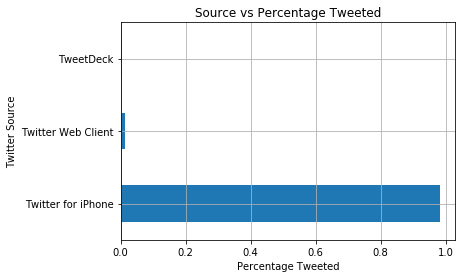

In [253]:
ax = df.source.value_counts(normalize=True).plot(kind='barh',title='Source vs Percentage Tweeted', grid=True);
ax.set_xlabel("Percentage Tweeted")
ax.set_ylabel("Twitter Source")

**<a id='A2'>A2:</a> What are the top 3 tweets that has the most retweets?**

In [254]:
df.nlargest(3, 'retweet_count')[['tweet_id','retweet_count','favorite_count','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name']]

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
769,744234799360020481,78297,157175,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None
804,739238157791694849,58030,116025,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None
396,807106840509214720,57097,121402,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan


Above are the top 3 retweeted tweets. All of them have a very good rating.

**<a id='A3'>A3:</a> What are the top 5 common dog names? Plot a visualization for dog Name vs Frequency.**

We'll get the list of top 10 dog names as shown below.

In [255]:
df.name.value_counts().sort_values(ascending=False)[1:6]

Cooper     10
Oliver     10
Charlie    10
Lucy        9
Tucker      9
Name: name, dtype: int64

Below bar plot shows the most common dog names and their frequency.

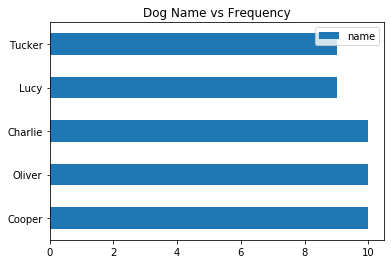

In [256]:
df.name.value_counts().sort_values(ascending=False)[1:6].plot(kind='barh',title='Dog Name vs Frequency', legend=True);

**<a id='A4'>A4:</a> How does the number of tweets posted over time look like?**

In [257]:
# convert timestamp datatype to datetime first

df.timestamp = pd.to_datetime(df.timestamp)

In [258]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts()

2015-12    366
2015-11    296
2016-01    169
2016-03    120
2016-02    111
2016-07     87
2016-06     81
2017-01     66
2016-10     65
2017-02     63
2016-09     62
2016-08     59
2016-05     57
2016-04     54
2016-12     54
2016-11     53
2017-07     49
2017-03     46
2017-06     43
2017-05     43
2017-04     41
2017-08      2
Name: timestamp, dtype: int64

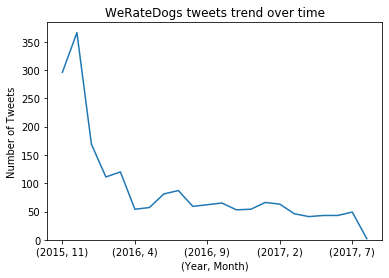

In [259]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot(kind='line', title='WeRateDogs tweets trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweets_trend')

**<a id='A5'>A5:</a> What is the most common rating for a dog and how does the rating trend look like?**

In [260]:
print("Rating  #Dogs")
print("============")
df[df.rating_denominator==10]['rating_numerator'].value_counts().sort_index()

Rating  #Dogs


0         2
1         4
2         9
3        19
4        15
5        33
6        32
7        51
8        95
9       151
10      421
11      399
12      448
13      258
14       36
420       1
1776      1
Name: rating_numerator, dtype: int64

Above table shows the number of dogs with rating out of 10. Below bar chart depicts the=is scenario.

Text(0, 0.5, 'Number of Dogs')

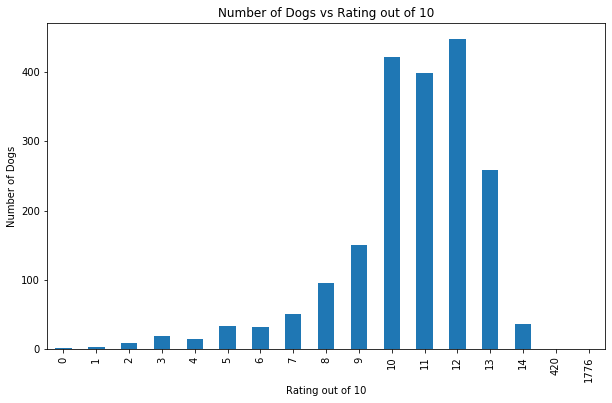

In [261]:
ax = df[df.rating_denominator==10]['rating_numerator'].value_counts().sort_index().plot(kind="bar",title="Number of Dogs vs Rating out of 10", figsize=(10,6));
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")

**<a id='A6'>A6:</a> Number of dogs correctly identified by image prediction algorithm with confidence > 95%**

In [262]:
incorrectly_classified = df['breed'][df['breed'] == 'None'].value_counts()[0]

correctly_classified = sum(df['breed'].value_counts()[1:])

In [263]:
print(f"No of dogs that aren't recognized by image prediction algo with 95% confidence: {incorrectly_classified}")

print(f"No of dogs that are recognized by image predicted algo with 95% confidence: {correctly_classified}")

No of dogs that aren't recognized by image prediction algo with 95% confidence: 1804
No of dogs that are recognized by image predicted algo with 95% confidence: 183


**<a id='A7'>A7:</a> Which dog stage has most retweets and favourites?**

In [266]:
# retweet_count mean and favourite_count mean for dog stage 'doggo'

retweets = []
favourites = []

print("Mean stats of doggo:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'doggo'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'doggo'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'doggo'].mean()))

print("\n===============================================\n")

# retweet_count mean and favourite_count mean for dog stage 'floofer'
print("Mean stats of floofer:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'floofer'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'floofer'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'floofer'].mean()))

print("\n===============================================\n")

# retweet_count mean and favourite_count mean for dog stage 'pupper'
print("Mean stats of pupper:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'pupper'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'pupper'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'pupper'].mean()))

print("\n===============================================\n")

# retweet_count mean and favourite_count mean for dog stage 'puppo'
print("Mean stats of puppo:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'puppo'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'puppo'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'puppo'].mean()))

print("\n===============================================\n")

# retweet_count mean and favourite_count mean for dog stage 'doggo, pupper'
print("Mean stats of doggo, pupper:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'doggo, pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'doggo, pupper'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'doggo, pupper'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'doggo, pupper'].mean()))

print("\n===============================================\n")

# retweet_count mean and favourite_count mean for dog stage 'doggo, floofer'
print("Mean stats of doggo, floofer:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'doggo, floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'doggo, floofer'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'doggo, floofer'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'doggo, floofer'].mean()))

print("\n===============================================\n")

# retweet_count mean and favourite_count mean for dog stage 'doggo, puppo'
print("Mean stats of doggo, puppo:")
print("----------------------------------------------\n")
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.dog_stage == 'doggo, puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.dog_stage == 'doggo, puppo'].mean())))

retweets.append(round(df.retweet_count[df.dog_stage == 'doggo, puppo'].mean()))
favourites.append(round(df.favorite_count[df.dog_stage == 'doggo, puppo'].mean()))

print("\n===============================================\n")

print(retweets)
print(favourites)

Mean stats of doggo:
----------------------------------------------

Mean Retweet Count	6572
Mean Favorite Count	18987


Mean stats of floofer:
----------------------------------------------

Mean Retweet Count	4380
Mean Favorite Count	12133


Mean stats of pupper:
----------------------------------------------

Mean Retweet Count	2103
Mean Favorite Count	6708


Mean stats of puppo:
----------------------------------------------

Mean Retweet Count	5860
Mean Favorite Count	21065


Mean stats of doggo, pupper:
----------------------------------------------

Mean Retweet Count	3771
Mean Favorite Count	12608


Mean stats of doggo, floofer:
----------------------------------------------

Mean Retweet Count	3068
Mean Favorite Count	15913


Mean stats of doggo, puppo:
----------------------------------------------

Mean Retweet Count	17415
Mean Favorite Count	44594


[6572, 4380, 2103, 5860, 3771, 3068, 17415]
[18987, 12133, 6708, 21065, 12608, 15913, 44594]


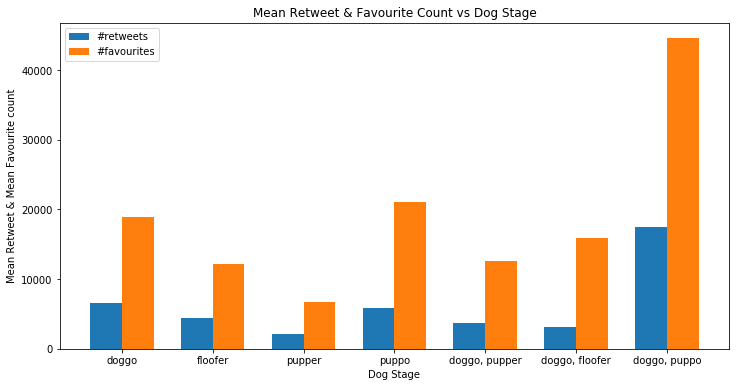

In [271]:
x = np.arange(7)

width = 0.35

labels = ['doggo','floofer','pupper','puppo','doggo, pupper','doggo, floofer','doggo, puppo']

fig, ax = plt.subplots(figsize=(12,6))


rects1 = ax.bar(x - width/2, retweets, width, label='#retweets')
rects2 = ax.bar(x + width/2, favourites, width, label='#favourites')

# Add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel('Dog Stage')
ax.set_ylabel('Mean Retweet & Mean Favourite count')
ax.set_title('Mean Retweet & Favourite Count vs Dog Stage')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Above graph shows mean retweet count and mean favourite count for each dog stage

<a id='conclusion'></a>
## Conclusion

In This assignment, i have gathered data from various sources i.e downloaded a a dataset manually, fetched data from apis and fetched data from twitter developer apis and converted them into pandas dataframes. Cleaned the quality and tidiness problems in these datframes, merged them into a single master dataframe.
Have read data from this master dataframe and have done some analysis on this dataset and have produced some meaningful visualizations.